In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data2=pd.read_csv('Data.csv')
#data2=data2.sort_values('Date')
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,08-10-2015 13.00,0.00,245.00,0.00,245.00,245.00,0.606654
1,08-10-2015 14.00,245.00,245.00,244.50,245.00,245.00,4.453649
2,08-10-2015 15.00,245.00,245.00,244.92,244.92,244.92,3.016926
3,08-10-2015 16.00,244.92,244.92,244.25,244.25,244.25,3.895252
4,08-10-2015 17.00,244.25,244.99,244.02,244.99,244.99,3.920632


In [ ]:
data2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
39460,08-04-2020 20.00,7320.11,7375.72,7313.66,7327.70,7327.70,153.655811
39461,08-04-2020 21.00,7327.70,7370.00,7311.33,7337.19,7337.19,35.551553
39462,08-04-2020 22.00,7337.19,7390.25,7322.87,7367.28,7367.28,88.486108
39463,08-04-2020 23.00,7367.28,7398.92,7348.47,7369.60,7369.60,66.558293
39464,09-04-2020 0.00,7369.60,7369.60,7338.23,7338.23,7338.23,7.788915


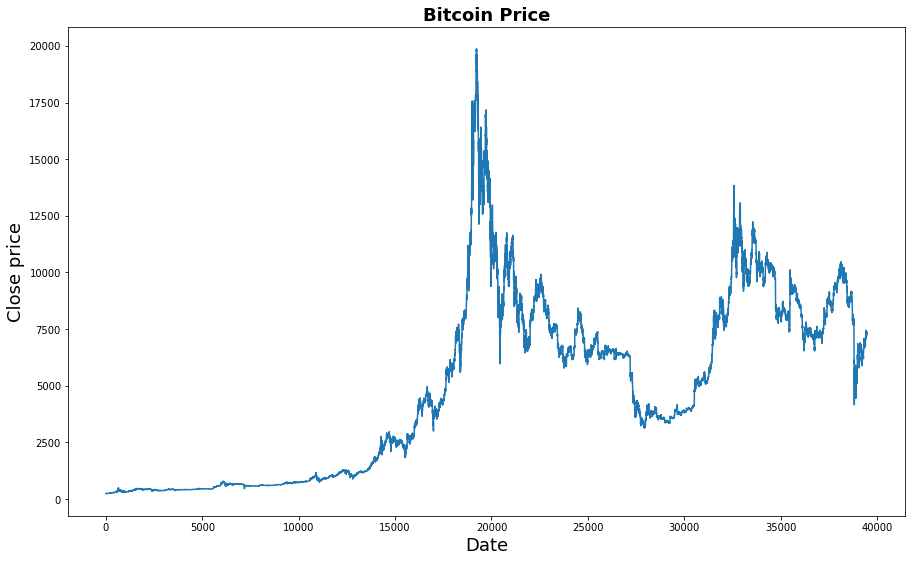

In [ ]:
price=data2[['Close']]
plt.figure(figsize=(15,9))
plt.plot(price)
plt.title("Bitcoin Price",fontsize=18,fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price',fontsize=18)
plt.show()

In [ ]:
price

,Close
0,245.00
1,245.00
2,244.92
3,244.25
4,244.99
...,...
39460,7327.70
39461,7337.19
39462,7367.28
39463,7369.60


In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39465 entries, 0 to 39464
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   39465 non-null  float64
dtypes: float64(1)
memory usage: 308.4 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
norm_data=min_max_scaler.fit_transform(price.values)

In [ ]:
norm_data

array([[7.13329998e-05],
       [7.13329998e-05],
       [6.72568284e-05],
       ...,
       [3.62966760e-01],
       [3.63084969e-01],
       [3.61486600e-01]])

In [ ]:
print(f'Real :{price.values[0]},Normalized: {norm_data[0]}')
print(f'Real :{price.values[500]},Normalized: {norm_data[500]}')
print(f'Real :{price.values[900]},Normalized: {norm_data[900]}')


Real :[245.],Normalized: [7.13329998e-05]
Real :[312.],Normalized: [0.00348513]
Real :[351.16],Normalized: [0.00548041]


In [ ]:
def univariate_data(dataset, start_index, end_index, history_size,target_size):
  data=[]
  labels=[]

  start_index=start_index + history_size
  if end_index is None:
    end_index=len(dataset) - target_size

  for i in range(start_index ,end_index):
    indices= range(i - history_size,i)

    data.append(np.reshape(dataset[indices],(history_size,1)))
    labels.append(dataset[i+target_size])
  return np.array(data),np.array(labels)
past_history=5
future_target=0

TRAIN_SPLIT=int(len(norm_data)*0.8)

x_train,y_train=univariate_data(norm_data,0,TRAIN_SPLIT,past_history,future_target)

x_test,y_test=univariate_data(norm_data,TRAIN_SPLIT,None,past_history,future_target)





In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,LeakyReLU,Dropout
import tensorflow as tf

num_units=64
learning_rate=0.00001
activation_function='sigmoid'
loss_function='mae'
batch_size=5
num_epochs=150
model=Sequential()

model.add(LSTM(units= num_units, activation=activation_function,input_shape=(None,1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss=loss_function)



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_test

array([[[0.41156033],
        [0.41151039],
        [0.4078077 ],
        [0.39437366],
        [0.39490713]],

       [[0.41151039],
        [0.4078077 ],
        [0.39437366],
        [0.39490713],
        [0.40164249]],

       [[0.4078077 ],
        [0.39437366],
        [0.39490713],
        [0.40164249],
        [0.39575141]],

       ...,

       [[0.36025967],
        [0.36077786],
        [0.36056335],
        [0.36095007],
        [0.36143361]],

       [[0.36077786],
        [0.36056335],
        [0.36095007],
        [0.36143361],
        [0.36296676]],

       [[0.36056335],
        [0.36095007],
        [0.36143361],
        [0.36296676],
        [0.36308497]]])

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.1,batch_size=batch_size,epochs=num_epochs,shuffle=False)


Epoch 1/150
5682/5682 [==============================] - 17s 3ms/step - loss: 0.1258 - val_loss: 0.0398
Epoch 2/150
5682/5682 [==============================] - 17s 3ms/step - loss: 0.1185 - val_loss: 0.0368
Epoch 3/150
5682/5682 [==============================] - 16s 3ms/step - loss: 0.1128 - val_loss: 0.0360
Epoch 4/150
5682/5682 [==============================] - 16s 3ms/step - loss: 0.1068 - val_loss: 0.0341
Epoch 5/150
5682/5682 [==============================] - 15s 3ms/step - loss: 0.1017 - val_loss: 0.0361
Epoch 6/150
5682/5682 [==============================] - 16s 3ms/step - loss: 0.0962 - val_loss: 0.0333
Epoch 7/150
5682/5682 [==============================] - 16s 3ms/step - loss: 0.0920 - val_loss: 0.0356
Epoch 8/150
5682/5682 [==============================] - 16s 3ms/step - loss: 0.0878 - val_loss: 0.0332
Epoch 9/150
5682/5682 [==============================] - 16s 3ms/step - loss: 0.0845 - val_loss: 0.0350
Epoch 10/150
5682/5682 [==============================] - 16s 3m

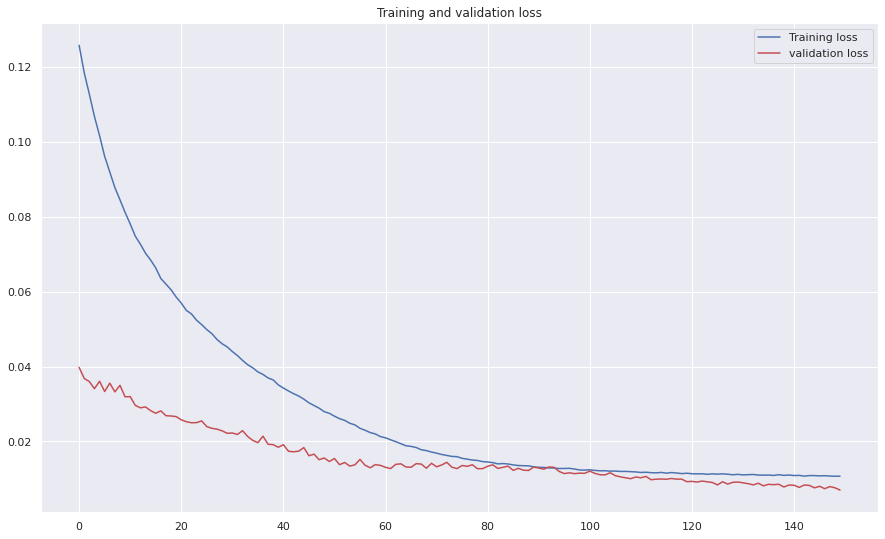

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(loss))

plt.figure(figsize=(15,9))

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()

Text(0, 0.5, 'Cost (USD)')

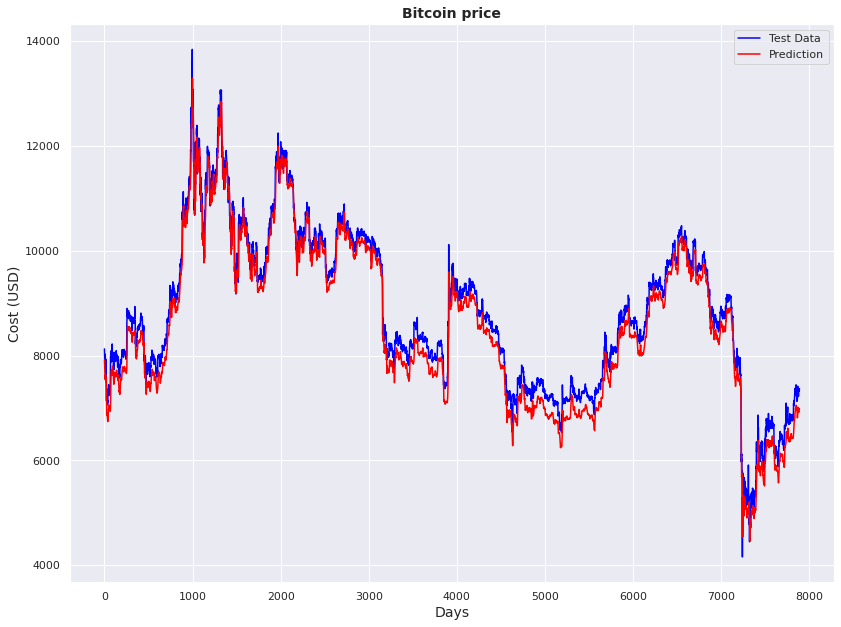

In [ ]:
original=pd.DataFrame(min_max_scaler.inverse_transform(y_test))
t=len(y_test)
predictions=pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))
sns.set(rc={'figure.figsize':(11.7+2,8.27+2)})
testc = pd.DataFrame()

ax=sns.lineplot(x=original.index,y=original[0],label="Test Data",color='blue')
ax=sns.lineplot(x=predictions.index,y=predictions[0],label="Prediction",color='red')
ax.set_title('Bitcoin price',size=14,fontweight='bold')
ax.set_xlabel("Days",size=14)
ax.set_ylabel("Cost (USD)",size=14)
